In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.optimize import minimize_scalar
from scipy.stats import norm
from scipy import integrate

### 1번

1-1

In [3]:
df = pd.read_csv('../data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.set_index('variety', inplace=True)
df

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.1,3.5,1.4,0.2
Setosa,4.9,3.0,1.4,0.2
Setosa,4.7,3.2,1.3,0.2
Setosa,4.6,3.1,1.5,0.2
Setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Virginica,6.7,3.0,5.2,2.3
Virginica,6.3,2.5,5.0,1.9
Virginica,6.5,3.0,5.2,2.0


In [5]:
for i in df.index.unique():
    print(f'-------------------{i}-------------------')
    print(df.loc[i].info())

-------------------Setosa-------------------
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Setosa to Setosa
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  50 non-null     float64
 1   sepal.width   50 non-null     float64
 2   petal.length  50 non-null     float64
 3   petal.width   50 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB
None
-------------------Versicolor-------------------
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Versicolor to Versicolor
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  50 non-null     float64
 1   sepal.width   50 non-null     float64
 2   petal.length  50 non-null     float64
 3   petal.width   50 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB
None
-------------------Virginica-------------------
<class 'pandas.core.frame.Data

### 2번

2-1

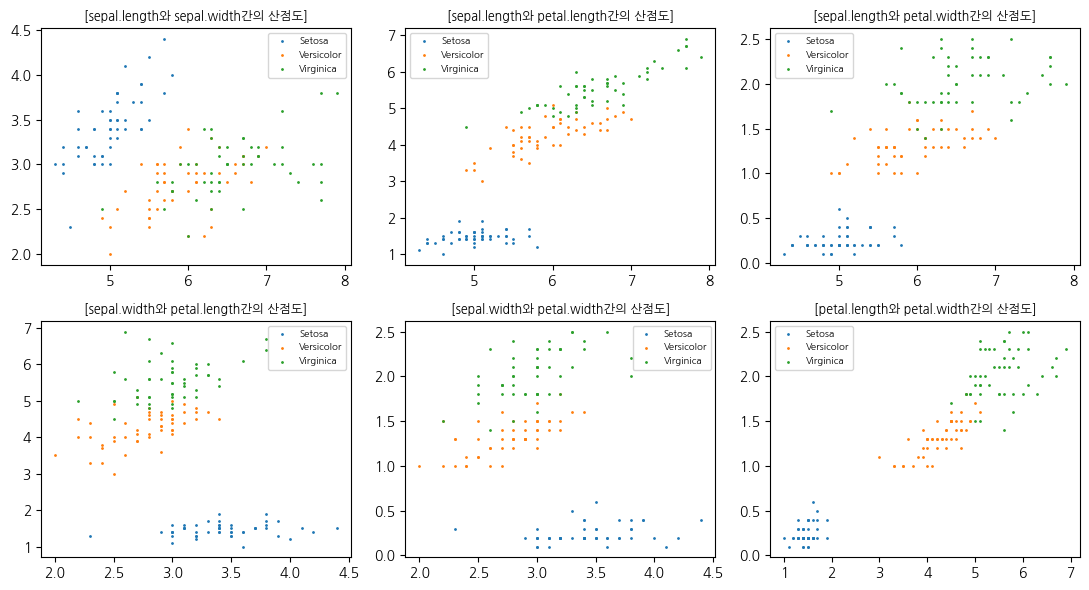

In [6]:
n = 1
c = 1
fig = plt.figure(figsize = (11,6))
for i in df.columns:
    for j in df.columns[c:]:
        if i != j:
            
            fig.add_subplot(2, 3, n)
            for k in df.index.unique():
                plt.scatter(df.loc[k,i],df.loc[k,j], s = 1, label = k)
            plt.title(f'[{i}와 {j}간의 산점도]', size = 9)
            plt.legend(fontsize = 'x-small')
            n+=1
    c += 1

plt.tight_layout()

2-2

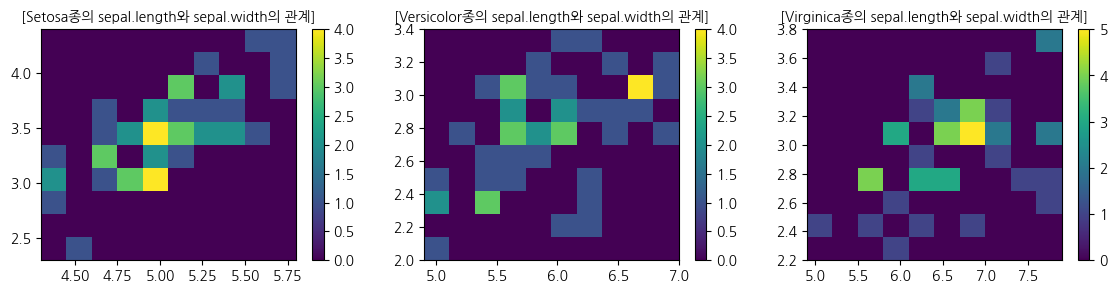

In [7]:
n = 1
plt.figure(figsize=(14,3))
for i in df.index.unique():
    plt.subplot(1,3,n)
    plt.hist2d(df.loc[i,'sepal.length'], df.loc[i,'sepal.width'])
    plt.title(f'[{i}종의 sepal.length와 sepal.width의 관계]', size = 10)
    plt.colorbar()
    n +=1


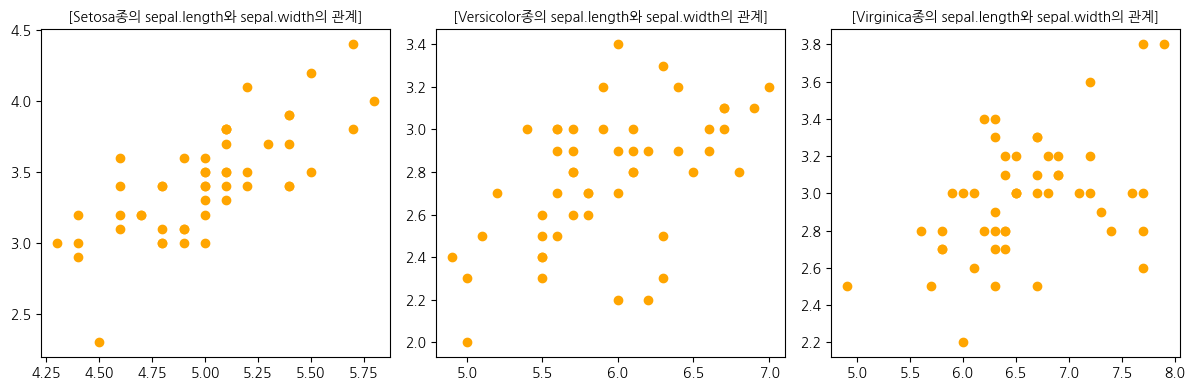

In [8]:
n = 1
plt.figure(figsize=(12,4))
for i in df.index.unique():
    plt.subplot(1,3,n)
    plt.scatter(df.loc[i,'sepal.length'], df.loc[i,'sepal.width'], color = 'orange')
    plt.title(f'[{i}종의 sepal.length와 sepal.width의 관계]', size = 10)
    n +=1
plt.tight_layout()

### 3번

3-1

In [9]:
np.mean(df['petal.length'])

3.7580000000000005

In [10]:
np.var(df['petal.length'])

3.0955026666666674

3-2

In [11]:
x_wrange = np.array(df["petal.width"])
x_wrange

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

Text(0.5, 1.0, '[Petal Width의 확률밀도함수]')

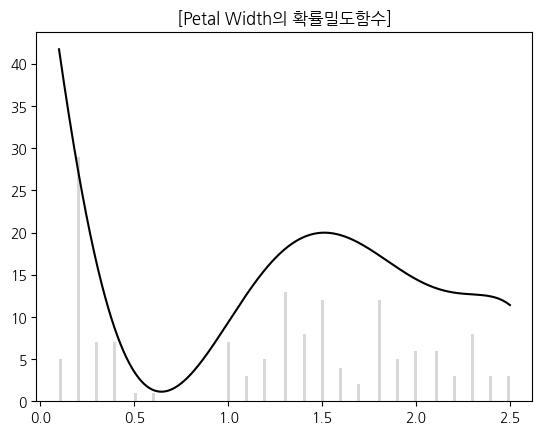

In [12]:
plt.hist(df['petal.width'],bins = 150, color = 'gray',alpha = 0.3)
y1 = np.concatenate([np.linspace(41,8),np.linspace(8,1),np.linspace(1,7),np.linspace(7,8),np.linspace(8,33),np.linspace(33,6),np.linspace(6,23),np.linspace(23,9),np.linspace(9,14)])
x1 = np.linspace(x_wrange.min(),x_wrange.max(),450)
fx1 = np.poly1d(np.polyfit(x1,y1,6))
plt.plot(x1,fx1(x1), color = 'k')
plt.title('[Petal Width의 확률밀도함수]')

Text(0.8, 0.25, '확률밀도함수 \n         2\n-0.2738 x + 0.6638 x + 0.1005')

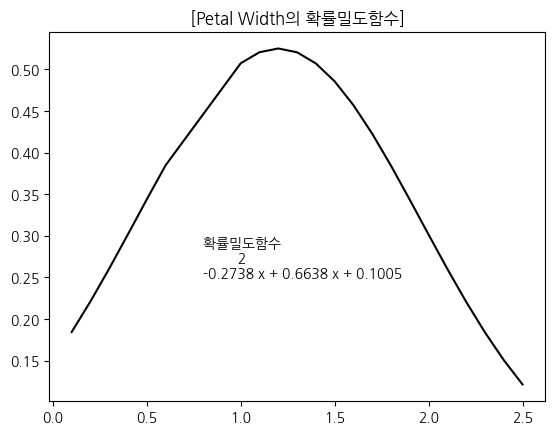

In [13]:
# 정규화
data = df['petal.width'].sort_values()
x1 = data
y1 = norm.pdf(data,np.mean(data), np.std(data))
fx1 = np.poly1d(np.polyfit(x1,y1,2))
plt.plot(x1,y1, color = 'k')
plt.title('[Petal Width의 확률밀도함수]')
plt.text(0.8,0.25,f'확률밀도함수 \n{fx1}')

3-3

In [14]:
per = [i>=4 and i<5 for i in df['petal.length']].count(True)/df.shape[0]
print(f'{per * 100:.2f}%')

28.67%


In [15]:
x_range = np.array(df["petal.length"])
x_range

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

27.88%


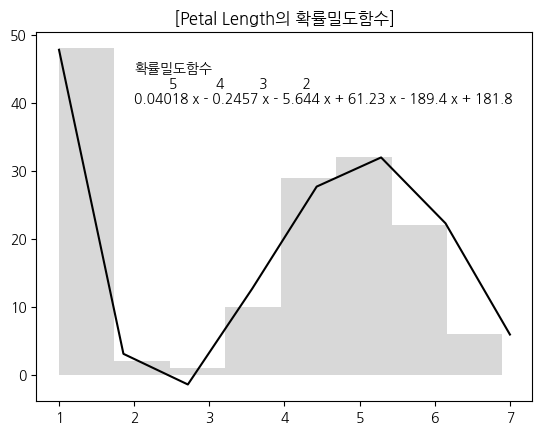

In [16]:
y = plt.hist(df['petal.length'],bins = 8, color = 'gray', alpha = 0.3)[0]
x = np.linspace(1,7,8)
fx = np.poly1d(np.polyfit(x,y,5))
plt.plot(x,fx(x), color = 'k')
plt.title('[Petal Length의 확률밀도함수]')
plt.text(2,40,f'확률밀도함수\n{fx}')
print(f'{integrate.quad(fx,4,5)[0]:.2f}%')

24.28%


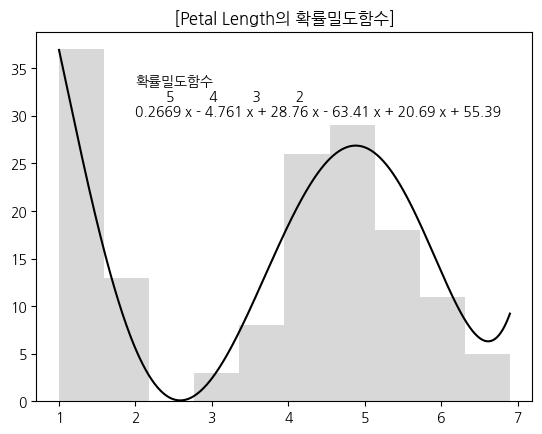

In [19]:
# 다른 방식 시도
plt.hist(df['petal.length'], color = 'gray', alpha = 0.3)
x3 = np.linspace(x_range.min(),x_range.max(),450)
y3 = np.concatenate([np.linspace(37,13), np.linspace(13,0),np.linspace(0,3),np.linspace(3,8),np.linspace(8,26),np.linspace(26,29),np.linspace(29,18),np.linspace(18,11), np.linspace(11,5)])
fx3 = np.poly1d(np.polyfit(x3,y3,5))
plt.plot(x3,fx3(x3),color = 'k')
plt.title('[Petal Length의 확률밀도함수]')
plt.text(2,30,f'확률밀도함수\n{fx3}')
print(f'{integrate.quad(fx3,4,5)[0]:.2f}%')

0.20137746023844888

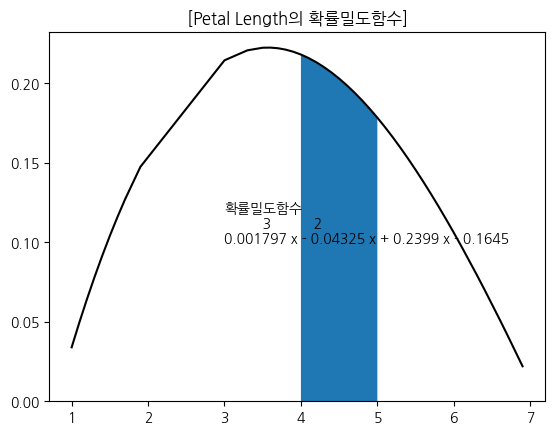

In [18]:
# 정규화
data2 = df['petal.length'].sort_values()
x2 = data2
y2 = norm.pdf(data2,np.mean(data2), np.std(data2))
fx2 = np.poly1d(np.polyfit(x2,y2,3))
plt.plot(x2,fx2(x2), color = 'k')
plt.title('[Petal Length의 확률밀도함수]')
plt.text(3,0.1,f'확률밀도함수\n{fx2}')
plt.ylim(0)
xs = np.linspace(4,5,100)
plt.fill_between(xs,fx2(xs), label = 'prob')
# 4 ~ 5 넓이
integrate.quad(fx2,4,5)[0]